In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from datetime import date
import statsmodels.api as sm
import plotly.graph_objs as go
from matplotlib import pyplot
from matplotlib import pyplot as plt
import plotly.offline as py
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

In [3]:
data.isnull().sum()

Timestamp                  0
Open                 1214307
High                 1214307
Low                  1214307
Close                1214307
Volume_(BTC)         1214307
Volume_(Currency)    1214307
Weighted_Price       1214307
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data['date'] = pd.to_datetime(data['Timestamp'],unit='s').dt.date

In [6]:
group = data.groupby("date")

In [7]:
Daily_Price = group['Weighted_Price'].mean()

In [8]:
len(Daily_Price)

2504

In [9]:
d0 = date(2011,12,31)
d1 = date(2017,5,1)
delta = d1 - d0
days = delta.days + 1

In [10]:
data_train = Daily_Price[0 : days]
data_test = Daily_Price[days:]

In [11]:
print(len(data_train), len(data_test))

1949 555


In [12]:
working_data = [data_train, data_test]
working_data = pd.concat(working_data)
working_data = working_data.reset_index()
working_data['date'] = pd.to_datetime(working_data['date'])
working_data = working_data.set_index('date')

{'data': [Scatter({
      'line': {'color': 'rgb(244, 146, 65)', 'width': 4},
      'mode': 'lines',
      'name': 'Trend',
      'x': array([   0,    1,    2, ..., 2501, 2502, 2503]),
      'y': array([nan, nan, nan, ..., nan, nan, nan])
  }), Scatter({
      'line': {'color': 'rgb(66, 244, 155)', 'width': 2},
      'mode': 'lines',
      'name': 'Seasonal',
      'x': array([   0,    1,    2, ..., 2501, 2502, 2503]),
      'y': array([124.9038962 , 101.83102738, 104.33957414, ..., 101.83102738,
                  104.33957414, 107.99358837])
  }), Scatter({
      'line': {'color': 'rgb(209, 244, 66)', 'width': 2},
      'mode': 'lines',
      'name': 'Residual',
      'x': array([   0,    1,    2, ..., 2501, 2502, 2503]),
      'y': array([nan, nan, nan, ..., nan, nan, nan])
  }), Scatter({
      'line': {'color': 'rgb(66, 134, 244)', 'width': 2},
      'mode': 'lines',
      'name': 'Observed',
      'x': array([   0,    1,    2, ..., 2501, 2502, 2503]),
      'y': array([4.47160287e

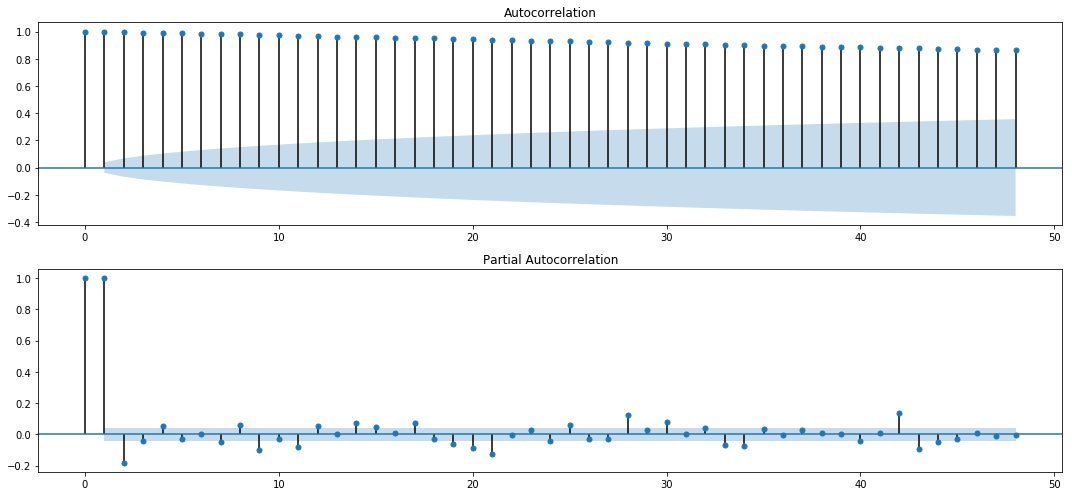

In [16]:
s = sm.tsa.seasonal_decompose(working_data.Weighted_Price.values, freq=100)

trace1 = go.Scatter(x = np.arange(0, len(s.trend), 1),y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(244, 146, 65)'), width = 4))
trace2 = go.Scatter(x = np.arange(0, len(s.seasonal), 1),y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(66, 244, 155)'), width = 2))

trace3 = go.Scatter(x = np.arange(0, len(s.resid), 1),y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(209, 244, 66)'), width = 2))

trace4 = go.Scatter(x = np.arange(0, len(s.observed), 1),y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Seasonal decomposition', xaxis = dict(title = 'Time'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
display(fig)
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(working_data.Weighted_Price.values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(working_data.Weighted_Price.values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()